In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
W_Data=pd.read_csv("../input/creditcard.csv")
W_Data.dropna(thresh=284315)
Data=W_Data

<h1>Exploring the Dataset</h1>

In [3]:
Data.sample(frac=0.1).head(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
76756,56729.0,1.543236,-0.921186,0.394875,-1.540023,-1.173903,-0.400428,-0.969743,-0.219714,-1.932001,...,-0.399021,-0.734803,0.047003,-0.468379,0.295051,-0.364323,0.050880,0.026524,23.10,0
11749,20102.0,-0.797742,1.260153,0.901902,0.091133,0.163251,-0.040587,0.030723,0.614006,0.567288,...,-0.310334,-0.772858,0.054382,-0.437362,-0.235168,0.069334,0.100393,0.001841,11.99,0
279877,169154.0,-0.314839,1.703036,0.395868,4.295969,0.471815,0.790607,0.159777,0.604611,-2.178254,...,0.428463,1.331671,-0.248315,-0.462169,-0.461627,0.630101,0.347297,0.188805,10.62,0
11598,19911.0,-0.325697,-0.004690,1.685760,-0.712090,-0.239492,0.346706,-0.389497,0.225920,0.097916,...,-0.021753,0.169632,-0.151189,-0.363692,-0.181632,-0.192762,0.102400,0.094447,10.00,0
128726,78813.0,1.167437,-0.786368,-0.511874,-0.886496,1.275732,3.890797,-1.165631,1.040898,1.069600,...,-0.256115,-0.745684,-0.000582,1.079968,0.276338,0.952361,-0.041176,0.016498,60.00,0


From the above it could be infered that the dataset has 28 anonymized features and 2 non anonymized features i) Amount and ii) Class (whether the transcation was a fraud or not) 

In [4]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
Positives=W_Data[W_Data['Class']==1]
Negatives=W_Data[W_Data['Class']==0]

In [7]:
print((len(Positives)/len(W_Data))*100,"%")

0.1727485630620034 %


It can infered that the datset is skewed with just 0.17274% fradulent examples. One could simply get a overall accuracy of 99.82726% by predicting every example isnt a fradulent example. But, the approach does not solve the problem. So recall rate (True positives/(True Positives+False Negatives)) would be the metric to optimize.  

<h2>Exploring Transcation Amount</h2>

**Fradulent Data**

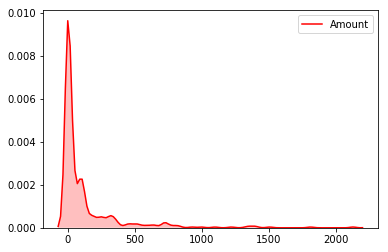

In [8]:
sns.kdeplot(Positives['Amount'],shade=True,color="red")

**Non-Fradulent Data**

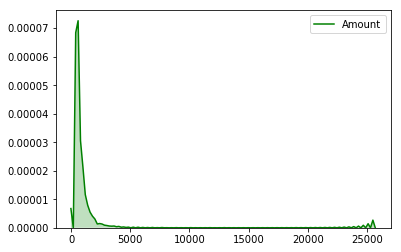

In [9]:
sns.kdeplot(Negatives['Amount'],shade=True,color="green")

<h2>Exploring Transcation Time</h2>

**Non-Fradulent Data**

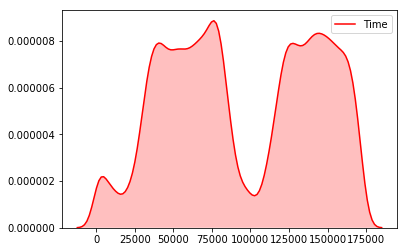

In [10]:
sns.kdeplot(Negatives['Time'],shade=True,color="red")

**Fradulent Data**

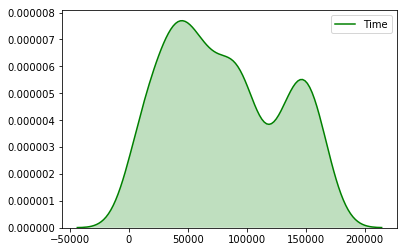

In [11]:
sns.kdeplot(Positives['Time'],shade=True,color="green")

<h1>Supervised Learning Algorithms</h1> 

For the purpose of evaluating algorithms. Lets first evaluate them on a part of the data since running the algorithms on all 284315 samples would be cumbersome. Lets take 50,000 examples for the purpose of evaluating the algorithms. We will use the entire dataset to evaluate the final accuracy. 

In [12]:
Negatives=Data[Data['Class']==0]
Positives=Data[Data['Class']==1]

In [13]:
Train_Data=Data[1:50000]
Target=Train_Data['Class']
Train_Data.drop('Class',axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
x_train,x_test,y_train,y_test=train_test_split(Train_Data,Target,test_size=0.5,random_state=0)

<h3>Support Vector Machine</h3>

In [16]:
clf_l=svm.SVC(kernel='linear')
clf_l.fit(x_train,y_train)
print(classification_report(y_test,clf_l.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     24931
          1       0.64      0.67      0.65        69

avg / total       1.00      1.00      1.00     25000



<h3>Random Forest Classifier</h3>

In [17]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
print(classification_report(y_test,clf.predict(x_test)))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     24931
          1       0.73      0.78      0.76        69

avg / total       1.00      1.00      1.00     25000



From the above example it could be noted that Random Forest Classifier does the best among supervised learning classifiers. Lets try using the algorithm on the entire dataset. 

In [18]:
E_Data=pd.read_csv("../input/creditcard.csv")
E_Data.dropna(thresh=284315)
E_Train_Data=E_Data
E_Target=E_Train_Data['Class']
E_Train_Data.drop('Class',axis=1,inplace=True)
x_train_E,x_test_E,y_train_E,y_test_E=train_test_split(E_Train_Data,E_Target,test_size=0.5,random_state=0)

In [19]:
clf_E = RandomForestClassifier(max_depth=2, random_state=0)
clf_E.fit(x_train, y_train)
print(classification_report(y_test_E,clf_E.predict(x_test_E)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142161
          1       0.87      0.47      0.61       243

avg / total       1.00      1.00      1.00    142404



<h1>Anomaly Detection Algorithms </h1>

<h2>Anomaly Detection </h2>

In [20]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

<h3>One Class SVM</h3>

In [21]:
W_Data=pd.read_csv("../input/creditcard.csv")
W_Data.dropna(thresh=284315)
Data=W_Data[1:50000]

In [22]:
Negatives=Data[Data['Class']==0]
Positives=Data[Data['Class']==1]

In [23]:
#RBF Kernel
clf_AD = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf_AD.fit(Negatives)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [24]:
#Linear Kernel
clf_AD_L = svm.OneClassSVM(nu=0.1, kernel="linear", gamma=0.1)
clf_AD_L.fit(Negatives)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='linear',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [25]:
IFA=IsolationForest()
IFA.fit(Negatives)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [31]:
train_AD_L=clf_AD_L.predict(Negatives)
test_AD_L=clf_AD_L.predict(Positives)

In [32]:
train_IFA=IFA.predict(Negatives)
test_IFA=IFA.predict(Positives)

In [33]:
train_AD=clf_AD.predict(Negatives)
test_AD=clf_AD.predict(Positives)

In [34]:
def Train_Accuracy(Mat):
   
   Sum=0
   for i in Mat:
    
        if(i==1):
        
           Sum+=1.0
            
   return(Sum/len(Mat)*100)

def Test_Accuracy(Mat):
   
   Sum=0
   for i in Mat:
    
        if(i==-1):
        
           Sum+=1.0
            
   return(Sum/len(Mat)*100)


In [35]:
print("Training: One Class SVM (RBF) : ",(Train_Accuracy(train_AD)),"%")
print("Test: One Class SVM (RBF) : ",(Test_Accuracy(test_AD)),"%")

Training: One Class SVM (RBF) :  32.90606005897575 %
Test: One Class SVM (RBF) :  100.0 %


In [36]:
print("Training: Isolation Forest: ",(Train_Accuracy(train_IFA)),"%")
print("Test: Isolation Forest: ",(Test_Accuracy(test_IFA)),"%")

Training: Isolation Forest:  89.9981946199675 %
Test: Isolation Forest:  95.94594594594594 %


In [37]:
print("Training: One Class SVM (Linear) : ",(Train_Accuracy(train_AD_L)),"%")
print("Test: One Class SVM (Linear) : ",(Test_Accuracy(test_AD_L)),"%")

Training: One Class SVM (Linear) :  89.9981946199675 %
Test: One Class SVM (Linear) :  2.027027027027027 %


Lets test Isolation Forest over the entire dataset (all 284315 examples)

In [38]:
W_Data=pd.read_csv("../input/creditcard.csv")
W_Data.dropna(thresh=284315)
Data=W_Data
Positives_E=W_Data[W_Data['Class']==1]
Negatives_E=W_Data[W_Data['Class']==0]

In [40]:
IFA=IsolationForest()
IFA.fit(Negatives_E)
train_IFA=IFA.predict(Negatives)
test_IFA=IFA.predict(Positives)

In [41]:
print("Training: Isolation Forest: ",(Train_Accuracy(train_IFA)),"%")
print("Test: Isolation Forest: ",(Test_Accuracy(test_IFA)),"%")

Training: Isolation Forest:  88.53984874927283 %
Test: Isolation Forest:  95.94594594594594 %


From the above analysis it could be noted that Isolation Forest  does the best among Anomaly detection algorithms. 

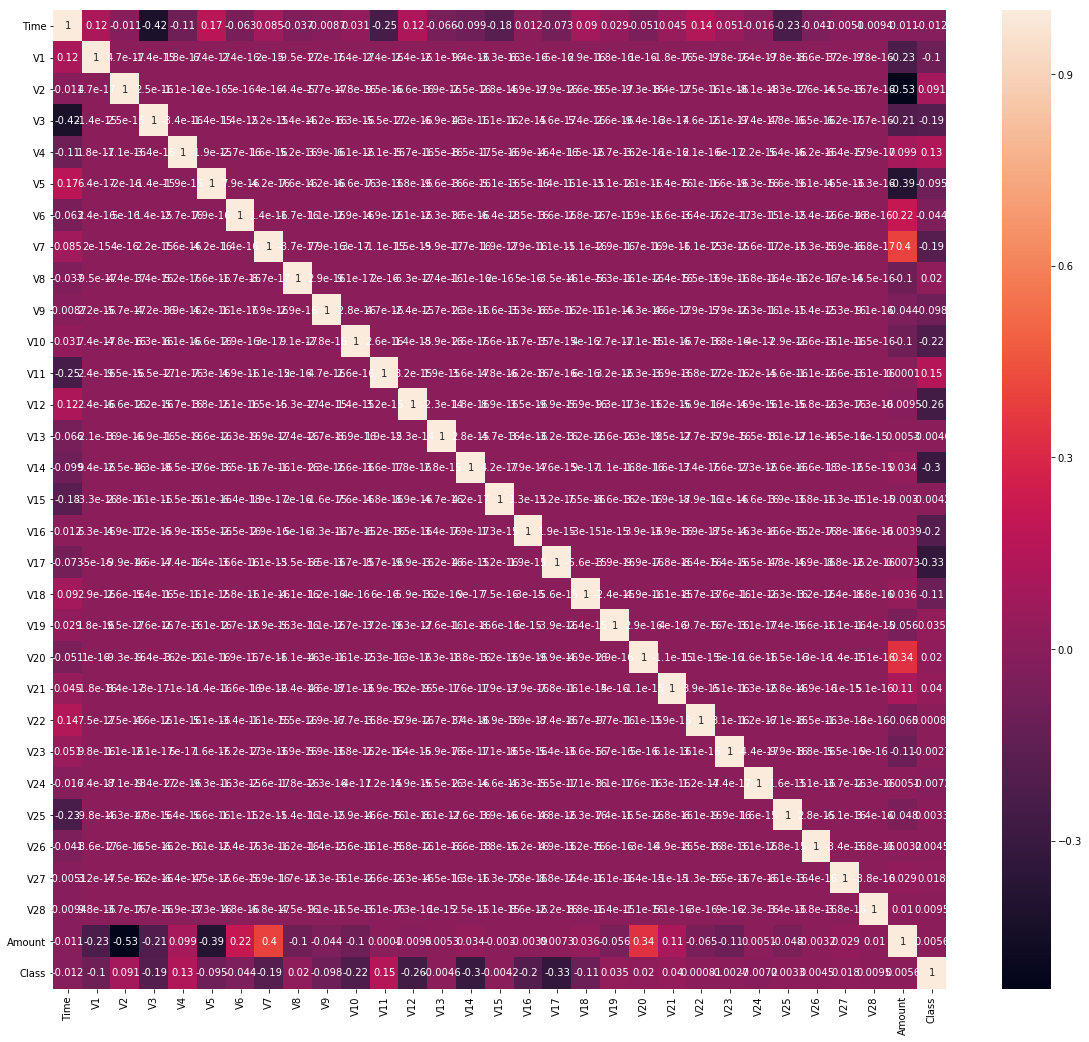

In [42]:
plt.figure(figsize=(20,18))
Corr=Data[Data.columns].corr()
sns.heatmap(Corr,annot=True)

The above matrix shows a correlation between variables. Eliminating lowly correlated variables did not help much in improving the algorithm. 

<h1>Evaluating Models on OverSampled Data </h1>

In [43]:
from imblearn.over_sampling import SMOTE 

W_Data=pd.read_csv("../input/creditcard.csv")
W_Data.dropna(thresh=284315)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(W_Data, W_Data['Class'])

In [44]:
S_Positives=[]
S_Negatives=[]

for i in range(0,len(X_res)):
    if(y_res[i]==0):
        S_Negatives.append(X_res[i])
    else:
        S_Positives.append(X_res[i])

In [45]:
IFA=IsolationForest()
IFA.fit(S_Negatives)
S_train_IFA=IFA.predict(S_Negatives)
S_test_IFA=IFA.predict(S_Positives)

In [46]:
print("Training: Isolation Forest: ",(Train_Accuracy(S_train_IFA)),"%")
print("Test: Isolation Forest: ",(Test_Accuracy(S_test_IFA)),"%")

Training: Isolation Forest:  89.99982413871938 %
Test: Isolation Forest:  90.33360884933964 %


In [47]:
E_Data=pd.read_csv("../input/creditcard.csv")
E_Data.dropna(thresh=284315)
Outcome=E_Data['Class']
E_Data.drop('Class',axis=1,inplace=True)
X_res, y_res = sm.fit_sample(E_Data,Outcome)
x_train_E,x_test_E,y_train_E,y_test_E=train_test_split(X_res,y_res,test_size=0.5,random_state=0)
x_train_O,x_test_O,y_train_O,y_test_O=train_test_split(E_Data,Outcome,test_size=0.5,random_state=0)

In [48]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train_E, y_train_E)
print(classification_report(y_test_O,clf.predict(x_test_O)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142161
          1       0.23      0.83      0.36       243

avg / total       1.00      0.99      1.00    142404

